In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
from sklearn.metrics import mean_squared_error

1. Load the tips dataset from either pydataset or seaborn.

In [4]:
tips = sns.load_dataset("tips")

In [5]:
df = tips

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [7]:
# generate parameters and this creates the model
#x= total_bill, y = tip
ols_model = LinearRegression().fit(df[['total_bill']], df.tip)

# compute predictions and add to original dataframe
df['yhat'] = ols_model.predict(df[['total_bill']])

df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835


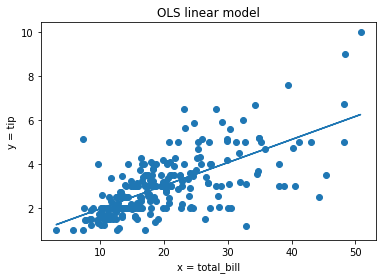

In [17]:
# visualize the line of best fit from OLS linear model
plt.scatter(df.total_bill, df.tip)
plt.plot(df.total_bill, df.yhat)
plt.xlabel('x = total_bill')
plt.ylabel('y = tip')
plt.title('OLS linear model');

In [8]:
# assuming X and y are already defined
model = LinearRegression().fit(df.total_bill, df.tip)
predictions = model.predict(df.total_bill)

ValueError: Expected 2D array, got 1D array instead:
array=[16.99 10.34 21.01 23.68 24.59 25.29  8.77 26.88 15.04 14.78 10.27 35.26
 15.42 18.43 14.83 21.58 10.33 16.29 16.97 20.65 17.92 20.29 15.77 39.42
 19.82 17.81 13.37 12.69 21.7  19.65  9.55 18.35 15.06 20.69 17.78 24.06
 16.31 16.93 18.69 31.27 16.04 17.46 13.94  9.68 30.4  18.29 22.23 32.4
 28.55 18.04 12.54 10.29 34.81  9.94 25.56 19.49 38.01 26.41 11.24 48.27
 20.29 13.81 11.02 18.29 17.59 20.08 16.45  3.07 20.23 15.01 12.02 17.07
 26.86 25.28 14.73 10.51 17.92 27.2  22.76 17.29 19.44 16.66 10.07 32.68
 15.98 34.83 13.03 18.28 24.71 21.16 28.97 22.49  5.75 16.32 22.75 40.17
 27.28 12.03 21.01 12.46 11.35 15.38 44.3  22.42 20.92 15.36 20.49 25.21
 18.24 14.31 14.    7.25 38.07 23.95 25.71 17.31 29.93 10.65 12.43 24.08
 11.69 13.42 14.26 15.95 12.48 29.8   8.52 14.52 11.38 22.82 19.08 20.27
 11.17 12.26 18.26  8.51 10.33 14.15 16.   13.16 17.47 34.3  41.19 27.05
 16.43  8.35 18.64 11.87  9.78  7.51 14.07 13.13 17.26 24.55 19.77 29.85
 48.17 25.   13.39 16.49 21.5  12.66 16.21 13.81 17.51 24.52 20.76 31.71
 10.59 10.63 50.81 15.81  7.25 31.85 16.82 32.9  17.89 14.48  9.6  34.63
 34.65 23.33 45.35 23.17 40.55 20.69 20.9  30.46 18.15 23.1  15.69 19.81
 28.44 15.48 16.58  7.56 10.34 43.11 13.   13.51 18.71 12.74 13.   16.4
 20.53 16.47 26.59 38.73 24.27 12.76 30.06 25.89 48.33 13.27 28.17 12.9
 28.15 11.59  7.74 30.14 12.16 13.42  8.58 15.98 13.42 16.27 10.09 20.45
 13.28 22.12 24.01 15.69 11.61 10.77 15.53 10.07 12.6  32.83 35.83 29.03
 27.18 22.67 17.82 18.78].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
# establish baseline
df['yhat_baseline'] = df['tip'].mean()
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279


In [10]:
# calculate residuals
df['residual'] = df['yhat'] - df['tip']
df['residual_baseline'] = df['yhat_baseline'] - df['tip']

In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline,residual,residual_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,1.694636,1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,0.346223,1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,-0.373165,-0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,0.097250,-0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,-0.107178,-0.611721


3. Plot the residuals for the linear regression model that you made.

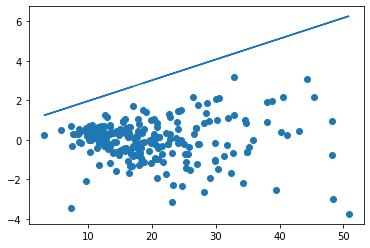

In [14]:
# plot the residuals
plt.scatter(df.total_bill,df.residual)
plt.plot(df.total_bill, df.yhat)

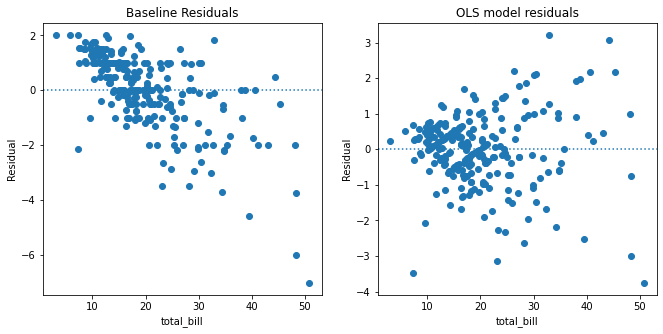

In [20]:
# residual plots (total_bill vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(df.total_bill, df.residual_baseline)
plt.axhline(y = 0, ls = ':')
plt.xlabel('total_bill')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(df.total_bill, df.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('total_bill')
plt.ylabel('Residual')
plt.title('OLS model residuals');

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [50]:
# calculate the sum of squared errors SSE

In [51]:
# square each residual value
df['residual^2'] = df.residual ** 2

df['residual_baseline^2'] = df.residual_baseline ** 2

df.head(3)

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline,residual,residual_baseline,residual^2,residual_baseline^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,1.694636,1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,0.346223,1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,-0.373165,-0.501721,0.139252,0.251724


In [52]:
# SSE
SSE = sum(df['residual^2'])
SSE_baseline = sum(df['residual_baseline^2'])

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

SSE =  252.78874385077597
SSE - baseline =  465.21247704918085


In [53]:
# compute explained sum of squares EES
ESS = sum((df.yhat - df.tip.mean())**2)
print(ESS)

212.4237331984042


In [56]:
# find mean squared error MSE
MSE2 = mean_squared_error(df.tip, df.yhat)

MSE2_baseline = mean_squared_error(df.tip, df.yhat_baseline)
print(MSE2)
print(MSE2_baseline)

1.036019442011377
1.906608512496641


In [60]:
# find # find total sum of squares TSS
TSS = ESS + SSE
print(TSS)

465.21247704918017


In [24]:
# calculate root mean squared error RMSE
RMSE2 = sqrt(mean_squared_error(df.tip, df.yhat))
RMSE2_baseline = sqrt(mean_squared_error(df.tip, df.yhat_baseline))
print(RMSE2)
print(RMSE2_baseline)

1.0178504025697377
1.3807999538298954


5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

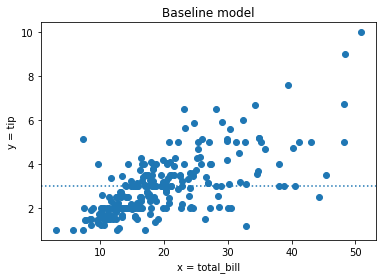

In [16]:
# plot data with baseline:

plt.scatter(df.total_bill, df.tip)
plt.axhline(df.tip.mean(), ls = ':')
plt.xlabel('x = total_bill')
plt.ylabel('y = tip')
plt.title('Baseline model');

In [23]:
# calculate SSE for baseline model
SSE_baseline = df['residual_baseline^2'].sum()

print(SSE_baseline)

465.2124770491804


In [25]:
# calculate MSE for baseline model

MSE_baseline = SSE_baseline/len(df)
print(MSE_baseline)

1.906608512496641


In [27]:
# calculate RMSE for baseline model

RMSE_baseline =  sqrt(MSE_baseline)
print(RMSE_baseline)

1.3807999538298954


In [29]:
# calculate MSE2 for baseline model
df['baseline'] = df.tip.mean()
MSE2_baseline = mean_squared_error(df.tip, df.baseline)
print(MSE2_baseline)

1.906608512496641


6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [33]:
def best_performer(model, b_model):
    SSE > SSE_baseline
    print('My model performs better than the baseline model')
    else:
    print('The baseline model performs better than my model')

SyntaxError: invalid syntax (<ipython-input-33-f081a0d3727c>, line 4)

7. What is the amount of variance explained in your model?

In [40]:
#r2_score == explained_variance_score
ESS = sum((df.yhat - df.tip.mean())**2)
SSE =  252.78874385077597
TSS = ESS + SSE
R2 = ESS/TSS
print(R2)

0.4566165863516763


8. Is your model better than the baseline model?

In [41]:
print(SSE_baseline)

465.2124770491804


In [42]:
df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])

print(df_eval)
print(df_baseline_eval)

NameError: name 'MSE' is not defined

In [43]:
df_eval = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
df_eval['model_error'] = np.array([SSE,  MSE, RMSE])


df_eval

NameError: name 'MSE' is not defined

In [44]:

from sklearn.metrics import r2_score
r2_score(df.tip, df.yhat)

0.45661658635167657